<a href="https://colab.research.google.com/github/ukeshbhaal/Guvi-Task5/blob/main/Final_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The  data  is  available  as  two  attached  CSV  files:
takehome_user_engagement. csv
takehome_users . csv

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime
import datetime as dt

df=pd.read_csv('/content/12000-takehome_user_engagement (2).csv')
#Dataset location - It has to be uploaded already in above location
df.shape
df.head(1)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1


In [2]:
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .
We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable

In [3]:
df.time_stamp=pd.to_datetime(df.time_stamp)

df['date'] = pd.to_datetime(df.time_stamp.dt.date)

"""df.time_stamp=pd.to_datetime(df.time_stamp.dt.date)"""
print(df.info())
#datetime=irdatacleaning.StringToDateTime(df,['time_stamp'])
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   date        207917 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 6.3 MB
None


,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [4]:
#To find the three separate weeks of signle week on given dataset - apply  Fn is used

def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()
df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')
df['adopted_user']=(df['visits_7_days']).apply(lambda x: 1 if x>=3 else 0)
df

,time_stamp,user_id,visited,date,visits_7_days,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0,0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0,0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0,0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0,0
...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0,0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0,0
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0,0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0,0


In [5]:
#df.info()
#df.describe()
#df.head(33)
with open('/content/12000-takehome_users (1).csv') as f:
    print(f)
tk_users = pd.read_csv('/content/12000-takehome_users (1).csv', parse_dates = ['creation_time'], 
                    encoding = "cp1252")
tk_users.info()

<_io.TextIOWrapper name='/content/12000-takehome_users (1).csv' mode='r' encoding='UTF-8'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float

In [6]:
#We need to concat the two individual dataset into one - So we are priniting single dataset of both to see how we can concat
tk_users['last_session_creation_time'] = pd.to_datetime(tk_users['last_session_creation_time'])
#tk_users.info()
(tk_users.head(1))
(df.head(1))
#Object_id is useless - Hence changing into user_id - to concat both files
tk_users.rename(columns={"object_id": "user_id"}, inplace=True)
print(tk_users.head(1))
df.head(1)

   user_id       creation_time            name                     email  \
0        1 2014-04-22 03:53:30  Clausen August  AugustCClausen@yahoo.com   

  creation_source    last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE 1970-01-01 00:00:01.398138810                         1   

   enabled_for_marketing_drip  org_id  invited_by_user_id  
0                           0      11             10803.0  


,time_stamp,user_id,visited,date,visits_7_days,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0


In [7]:
tk_users.set_index("user_id", inplace = True)


In [8]:
df_all =df.join(tk_users, on = 'user_id', how='left')
df_all

,time_stamp,user_id,visited,date,visits_7_days,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0,0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0,0,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0,0,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0,0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN


In [9]:
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   date                        207917 non-null  datetime64[ns]
 4   visits_7_days               207917 non-null  float64       
 5   adopted_user                207917 non-null  int64         
 6   creation_time               207917 non-null  datetime64[ns]
 7   name                        207917 non-null  object        
 8   email                       207917 non-null  object        
 9   creation_source             207917 non-null  object        
 10  last_session_creation_time  207917 non-null  datetime64[ns]
 11  opted_in_to_mailing_list    207917 non-

In [10]:
df_all.corr()['adopted_user']


user_id                      -0.008956
visited                            NaN
visits_7_days                 0.765048
adopted_user                  1.000000
opted_in_to_mailing_list     -0.005570
enabled_for_marketing_drip   -0.012589
org_id                        0.031526
invited_by_user_id           -0.003762
Name: adopted_user, dtype: float64

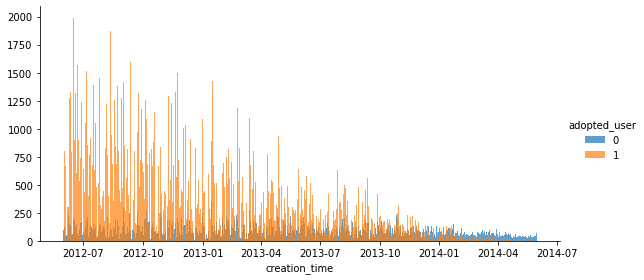

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(df_all, hue = "adopted_user", height=4, aspect=2,)
_ = g.map(plt.hist, 'creation_time', alpha=.7, bins = 500)
_ = g.add_legend() 
#sns.distplot(df_users['creation_time'], kde = False, bins = 500, hue = 'adopted_user')

In [12]:
#LogisticRegression
x=df_all[["visits_7_days","visited","opted_in_to_mailing_list","enabled_for_marketing_drip"]].values
y=df_all["adopted_user"].values

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train,y_train)
print(model1.intercept_)
print(model1.coef_)
model1.predict([[1.0,1,0,1]])

score = model1.score(X_test,y_test)
print(score)
print(score * 100,"%")


y_pred = model1.predict(X_test)
print(y_pred)
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[-35.61786873]
[[ 1.42795009e+01  2.72185610e-06  8.77630364e-03 -5.16886910e-02]]
1.0
100.0 %
[1 1 0 ... 1 0 0]
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [13]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
def cross_val(model):
   pred = cross_val_score(model, x, y, cv=10)
   return pred.mean()
def print_evaluate(true, predicted): 
   mae = metrics.mean_absolute_error(true, predicted)
   mse = metrics.mean_squared_error(true, predicted)
   rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
   r2_square = metrics.r2_score(true, predicted)
   print('MAE:', mae)
   print('MSE:', mse)
   print('RMSE:', rmse)
   print('R2 Square', r2_square)
   print('__________________________________')
 
def evaluate(true, predicted):
   mae = metrics.mean_absolute_error(true, predicted)
   mse = metrics.mean_squared_error(true, predicted)
   rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
   r2_square = metrics.r2_score(true, predicted)
   return mae, mse, rmse, r2_square
 


test_pred = model1.predict(X_test)
train_pred = model1.predict(X_train)
 
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
 
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                         columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])




Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [14]:
from sklearn.linear_model import Ridge
 
model = Ridge(alpha=100, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
 
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
 
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
 
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

from sklearn.linear_model import Lasso
 
model = Lasso(alpha=0.1,random_state=42)
model.fit(X_train, y_train)
 
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
 
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
 
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
from sklearn.preprocessing import PolynomialFeatures
 
poly_reg = PolynomialFeatures(degree=2)
 
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)
 
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)
 
test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
 
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
 
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)



Test set evaluation:
_____________________________________
MAE: 0.236641669929385
MSE: 0.07314426866642632
RMSE: 0.27045197108992625
R2 Square 0.5860877197446315
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.23583695527080567
MSE: 0.07286025200040763
RMSE: 0.2699263825571847
R2 Square 0.5852623109681676
__________________________________
Test set evaluation:
_____________________________________
MAE: 0.23274519106363498
MSE: 0.07563106160183361
RMSE: 0.2750110208734072
R2 Square 0.5720153371344292
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.23192293306461018
MSE: 0.07530084450684284
RMSE: 0.2744099934529405
R2 Square 0.5713698844640474
__________________________________


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Test set evaluation:
_____________________________________
MAE: 0.1273081175743104
MSE: 0.029403945530043916
RMSE: 0.1714757870080902
R2 Square 0.833607548961228
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12710213022149952
MSE: 0.029285042827571665
RMSE: 0.171128731741843
R2 Square 0.8333026492217271
__________________________________


In [15]:
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Polynomail Regression,0.127308,0.029404,0.171476,0.833608,0


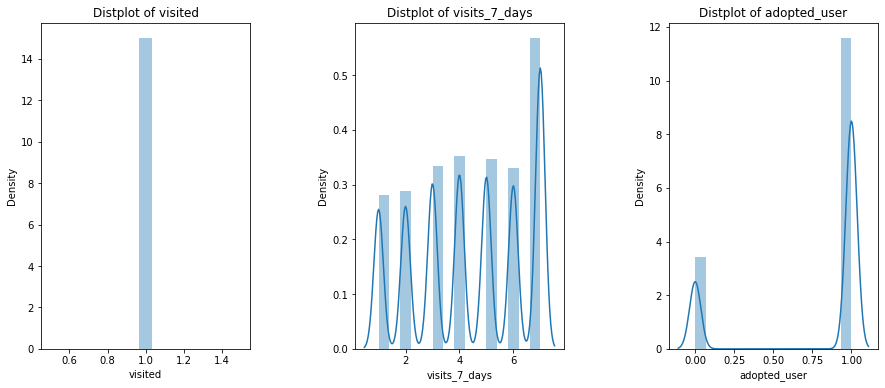

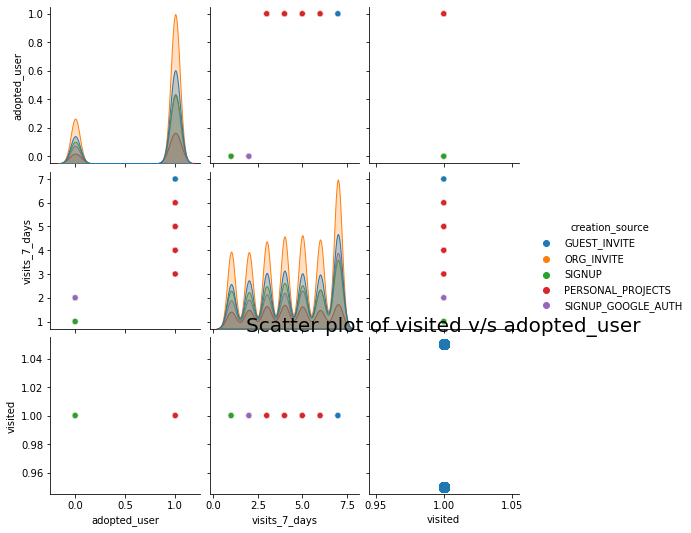

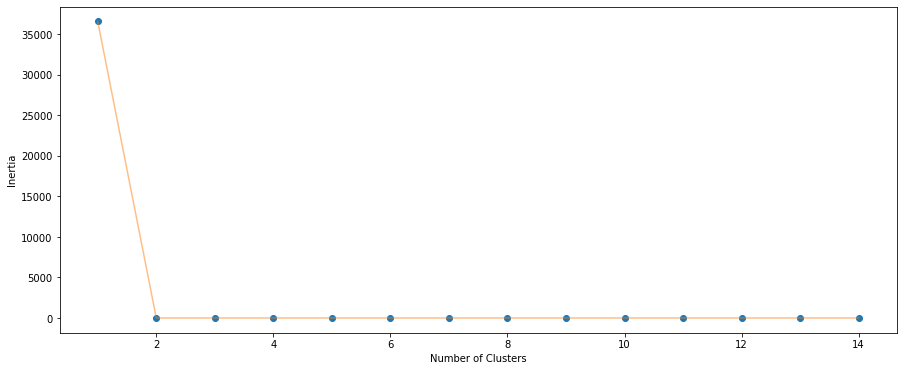

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
 
import plotly as py
import plotly.graph_objs as go
 
from sklearn.cluster import KMeans
 
import warnings
warnings.filterwarnings('ignore')
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['visited' , 'visits_7_days' , 'adopted_user']:
   n += 1
   plt.subplot(1 , 3 , n)
   plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
   sns.distplot(df_all[x] , bins = 15)
   plt.title('Distplot of {}'.format(x))
plt.show()


sns.pairplot(df_all, vars = ['adopted_user', 'visits_7_days', 'visited'], hue = "creation_source")


#2D Clustering based on adopted_user and visited¶
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of visited v/s adopted_user', fontsize = 20)
plt.xlabel('visited')
plt.ylabel('adopted_user')
plt.scatter( x = 'visited', y = 'adopted_user', data = df_all, s = 100)
plt.show()


#Deciding K value
X1 = df_all[['visited' , 'adopted_user']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
   algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                         random_state= 111 ) )
   algorithm.fit(X1)
   inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [17]:
df_all.describe().T


,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
visits_7_days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0
adopted_user,207917.0,0.772048,0.419512,0.0,1.0,1.0,1.0,1.0
opted_in_to_mailing_list,207917.0,0.258137,0.437611,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,207917.0,0.154533,0.361460,0.0,0.0,0.0,0.0,1.0
org_id,207917.0,164.315895,121.165846,0.0,60.0,145.0,260.0,416.0
invited_by_user_id,116887.0,5972.167555,3247.095621,3.0,3269.0,5972.0,8513.0,11999.0
